In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.3
                                   )

In [15]:
classes = ["not sleeping", "sleeping"]

train = data_generator.flow_from_directory(
r"C:\Users\harsh\Desktop\Sleep_Detection",
target_size = (128,128),
classes=classes,
batch_size=20,
class_mode='categorical',
subset="training"
)

val = data_generator.flow_from_directory(
r"C:\Users\harsh\Desktop\Sleep_Detection",
target_size = (128,128),
classes=classes,
batch_size=20,
class_mode='categorical',
subset="validation"
)

Found 52 images belonging to 2 classes.
Found 21 images belonging to 2 classes.


(128, 128, 3)


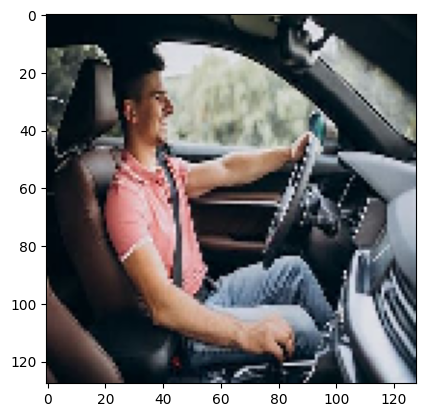

In [17]:
x_train, y_train = next(train)
x_val, y_val = next(val)

print(x_train[0].shape)
plt.imshow(x_train[0])
plt.show()

In [18]:
tf.keras.backend.clear_session()

model = Sequential([
    Conv2D(64, 7, activation="relu", padding="same",
                       input_shape=(128,128,3)),
    MaxPool2D(2),
    Conv2D(128, 5, activation="relu", padding="same"),
    #Conv2D(128, 3, activation="relu", padding="same"),
    MaxPool2D(2),
    #Conv2D(256, 3, activation="relu", padding="same"),
    Conv2D(128, 3, activation="relu", padding="same"),
    MaxPool2D(2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dense(2, activation="softmax")
])
model.layers[0].trainable = False

model.compile(
    loss="categorical_crossentropy", 
    optimizer=Adam(learning_rate=1e-5), 
    metrics=["accuracy"]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 64)        │           9,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,564,802 (17.41 MB)

 Trainable params: 4,555,330 (17.38 MB)

 Non-trainable params: 9,472 (37.00 KB)

In [19]:
checkpoint = ModelCheckpoint("model1.weights.h5", monitor  ='val_accuracy', save_weights_only = True, mode = 'max', verbose =1)
lr_callbacks = [checkpoint]

In [20]:
epochs=30
hist = model.fit(train,
                 epochs=epochs,
                 callbacks=lr_callbacks,
                 validation_data=val,)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.3994 - loss: 0.7131
Epoch 1: saving model to model1.weights.h5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 298ms/step - accuracy: 0.4053 - loss: 0.7123 - val_accuracy: 0.4286 - val_loss: 0.6955
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.4123 - loss: 0.7098
Epoch 2: saving model to model1.weights.h5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step - accuracy: 0.4294 - loss: 0.7067 - val_accuracy: 0.3333 - val_loss: 0.6957
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.4266 - loss: 0.7011
Epoch 3: saving model to model1.weights.h5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step - accuracy: 0.4305 - loss: 0.7004 - val_accuracy: 0.4286 - val_loss: 0.6947
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.4577 - loss: 0.6920
Epoch 4: saving model to model1.weights.h5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step - accuracy: 0.4490 - loss: 0.6929 - val_accuracy: 0.4286 - val_loss: 0.6935
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━

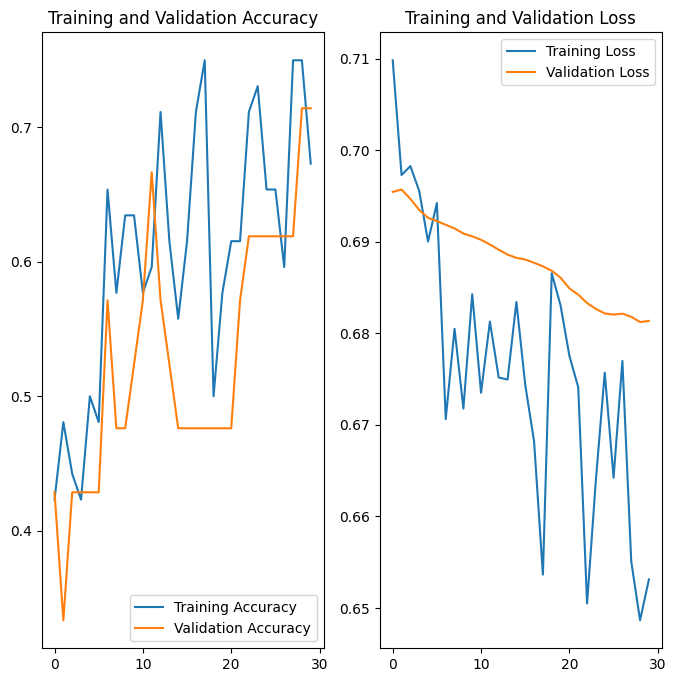

In [21]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
model_json = model.to_json()
with open("model_a2.json","w") as json_file:
    json_file.write(model_json)